In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Add the fourier_learning_ibm package to the path
import sys, pprint

sys.path.append("/home/jovyan/fourier_learning_ibm/")
pprint.pprint(sys.path)

['/home/jovyan',
 '/opt/conda/lib/python311.zip',
 '/opt/conda/lib/python3.11',
 '/opt/conda/lib/python3.11/lib-dynload',
 '',
 '/opt/conda/lib/python3.11/site-packages',
 '/home/jovyan/fourier_learning_ibm/']


In [3]:
from pycaret.regression import RegressionExperiment
import pickle
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from pycaret.regression import RegressionExperiment

from heisenberg_graph import (
    extract_probs,
)

In [4]:
# Only for CP1
%cd fourier_learning_ibm/

/home/jovyan/fourier_learning_ibm


In [5]:
# Load parameters
# CURRENT_TIME = "2024-12-10T15:41Z"
# path = f"./data/{CURRENT_TIME}"
path = "data/2024-12-11T02:55Z"

# Load the graphs as a binary file
with open(f"{path}/params_object.pkl", "rb") as f:
    params_object = pickle.load(f)

graphs = params_object["graphs"]
all_Js = params_object["Js"]
all_expected_values = params_object["expected_values"]

for key, value in params_object.items():
    print(f"{key}: {value}")

# Load the parameters as a JSON file
with open(f"{path}/params_text.json", "r") as f:
    params = json.load(f)

n_samples = params["n_samples"]
n_qubits = params["n_qubits"]
graph_type = params["graph_type"]
backend_qpu_name = params["backend_qpu_name"]
beta = params["beta"]
C = params["C"]
n_features = params["n_features"]
times = params["times"]

for key, value in params.items():
    print(f"{key}: {value}")

graphs: [<networkx.classes.graph.Graph object at 0x7f2345f85210>, <networkx.classes.graph.Graph object at 0x7f2345f86010>, <networkx.classes.graph.Graph object at 0x7f2345f86bd0>, <networkx.classes.graph.Graph object at 0x7f2345f87790>, <networkx.classes.graph.Graph object at 0x7f2345f7c390>, <networkx.classes.graph.Graph object at 0x7f2345f7cf50>, <networkx.classes.graph.Graph object at 0x7f2345f7db10>, <networkx.classes.graph.Graph object at 0x7f2345f7e6d0>, <networkx.classes.graph.Graph object at 0x7f2345f7f290>, <networkx.classes.graph.Graph object at 0x7f2345f7fe50>, <networkx.classes.graph.Graph object at 0x7f2345f98a50>, <networkx.classes.graph.Graph object at 0x7f2345f99610>, <networkx.classes.graph.Graph object at 0x7f2345f9a1d0>, <networkx.classes.graph.Graph object at 0x7f2345f9ad90>, <networkx.classes.graph.Graph object at 0x7f2345f9b950>, <networkx.classes.graph.Graph object at 0x7f2345fa4550>, <networkx.classes.graph.Graph object at 0x7f2345fa5110>, <networkx.classes.grap

## Plot probability

In [6]:
# Load the data as a json file
with open(f"{path}/probs_phase0_exact.json", "r") as f:
    probs_phase0_exact = json.load(f)
with open(f"{path}/probs_phase1_exact.json", "r") as f:
    probs_phase1_exact = json.load(f)
with open(f"{path}/probs_phase2_exact.json", "r") as f:
    probs_phase2_exact = json.load(f)
with open(f"{path}/probs_phase3_exact.json", "r") as f:
    probs_phase3_exact = json.load(f)

In [7]:
with open(f"{path}/probs_phase0_sim.json", "r") as f:
    probs_phase0_sim = json.load(f)
with open(f"{path}/probs_phase1_sim.json", "r") as f:
    probs_phase1_sim = json.load(f)
with open(f"{path}/probs_phase2_sim.json", "r") as f:
    probs_phase2_sim = json.load(f)
with open(f"{path}/probs_phase3_sim.json", "r") as f:
    probs_phase3_sim = json.load(f)

In [8]:
with open(f"{path}/probs_phase0_sim_noisy.json", "r") as f:
    probs_phase0_sim_noisy = json.load(f)
with open(f"{path}/probs_phase1_sim_noisy.json", "r") as f:
    probs_phase1_sim_noisy = json.load(f)
with open(f"{path}/probs_phase2_sim_noisy.json", "r") as f:
    probs_phase2_sim_noisy = json.load(f)
with open(f"{path}/probs_phase3_sim_noisy.json", "r") as f:
    probs_phase3_sim_noisy = json.load(f)

In [9]:
with open(f"{path}/probs_phase0_nmit.json", "r") as f:
    probs_phase0_nmit = json.load(f)
with open(f"{path}/probs_phase1_nmit.json", "r") as f:
    probs_phase1_nmit = json.load(f)
with open(f"{path}/probs_phase2_nmit.json", "r") as f:
    probs_phase2_nmit = json.load(f)
with open(f"{path}/probs_phase3_nmit.json", "r") as f:
    probs_phase3_nmit = json.load(f)

with open(f"{path}/probs_phase0_mit.json", "r") as f:
    probs_phase0_mit = json.load(f)
with open(f"{path}/probs_phase1_mit.json", "r") as f:
    probs_phase1_mit = json.load(f)
with open(f"{path}/probs_phase2_mit.json", "r") as f:
    probs_phase2_mit = json.load(f)
with open(f"{path}/probs_phase3_mit.json", "r") as f:
    probs_phase3_mit = json.load(f)

In [10]:
with open(f"{path}/successful_job_ids_and_samples.json", "r") as f:
    successful_job_ids_and_samples = json.load(f)

In [11]:
# For debugging
# dummy_successful_job_ids_and_samples = {}
# for i in range(n_samples):
#     dummy_successful_job_ids_and_samples[f"sample{i}"] = None

# successful_job_ids_and_samples = dummy_successful_job_ids_and_samples

In [12]:
probs_phase0_exact_extracted = extract_probs(
    probs_phase0_exact, successful_job_ids_and_samples.keys()
)
probs_phase1_exact_extracted = extract_probs(
    probs_phase1_exact, successful_job_ids_and_samples.keys()
)
probs_phase2_exact_extracted = extract_probs(
    probs_phase2_exact, successful_job_ids_and_samples.keys()
)
probs_phase3_exact_extracted = extract_probs(
    probs_phase3_exact, successful_job_ids_and_samples.keys()
)

In [13]:
probs_phase0_sim_extracted = extract_probs(
    probs_phase0_sim, successful_job_ids_and_samples.keys()
)
probs_phase1_sim_extracted = extract_probs(
    probs_phase1_sim, successful_job_ids_and_samples.keys()
)
probs_phase2_sim_extracted = extract_probs(
    probs_phase2_sim, successful_job_ids_and_samples.keys()
)
probs_phase3_sim_extracted = extract_probs(
    probs_phase3_sim, successful_job_ids_and_samples.keys()
)

In [14]:
probs_phase0_sim_noisy_extracted = extract_probs(
    probs_phase0_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase1_sim_noisy_extracted = extract_probs(
    probs_phase1_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase2_sim_noisy_extracted = extract_probs(
    probs_phase2_sim_noisy, successful_job_ids_and_samples.keys()
)
probs_phase3_sim_noisy_extracted = extract_probs(
    probs_phase3_sim_noisy, successful_job_ids_and_samples.keys()
)

In [15]:
probs_phase0_nmit_extracted = extract_probs(
    probs_phase0_nmit, successful_job_ids_and_samples.keys()
)
probs_phase1_nmit_extracted = extract_probs(
    probs_phase1_nmit, successful_job_ids_and_samples.keys()
)
probs_phase2_nmit_extracted = extract_probs(
    probs_phase2_nmit, successful_job_ids_and_samples.keys()
)
probs_phase3_nmit_extracted = extract_probs(
    probs_phase3_nmit, successful_job_ids_and_samples.keys()
)

probs_phase0_mit_extracted = extract_probs(
    probs_phase0_mit, successful_job_ids_and_samples.keys()
)
probs_phase1_mit_extracted = extract_probs(
    probs_phase1_mit, successful_job_ids_and_samples.keys()
)
probs_phase2_mit_extracted = extract_probs(
    probs_phase2_mit, successful_job_ids_and_samples.keys()
)
probs_phase3_mit_extracted = extract_probs(
    probs_phase3_mit, successful_job_ids_and_samples.keys()
)

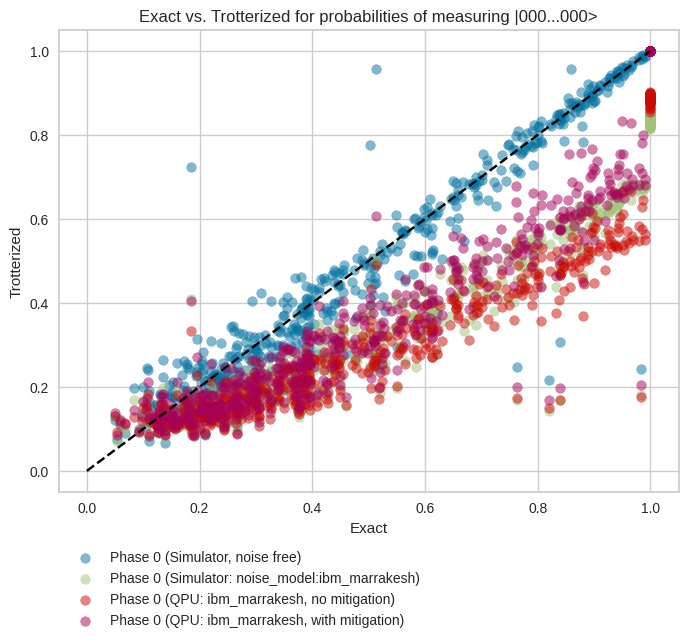

In [16]:
# Plot exact vs. Trotterized results
plt.figure(figsize=(8, 6))
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_sim_extracted,
    label=f"Phase 0 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_sim_noisy_extracted,
    label=f"Phase 0 (Simulator: noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_nmit_extracted,
    label=f"Phase 0 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase0_exact_extracted,
    probs_phase0_mit_extracted,
    label=f"Phase 0 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

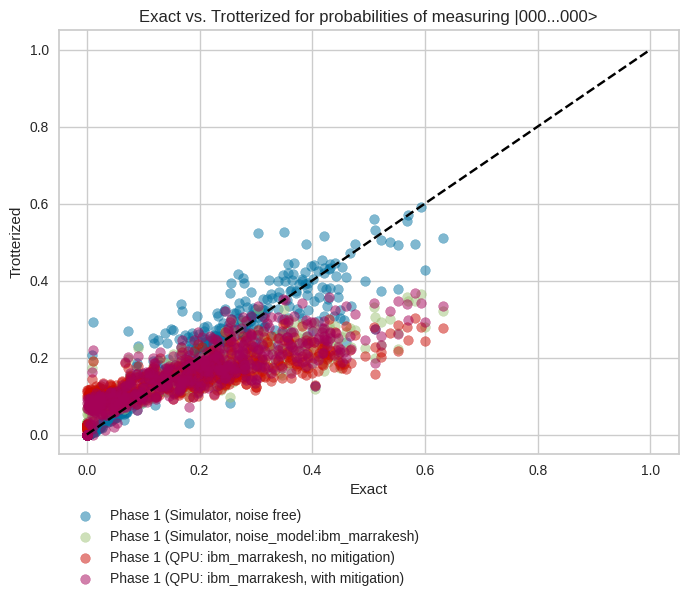

In [17]:
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_sim_extracted,
    label=f"Phase 1 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_sim_noisy_extracted,
    label=f"Phase 1 (Simulator, noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_nmit_extracted,
    label=f"Phase 1 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase1_exact_extracted,
    probs_phase1_mit_extracted,
    label=f"Phase 1 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

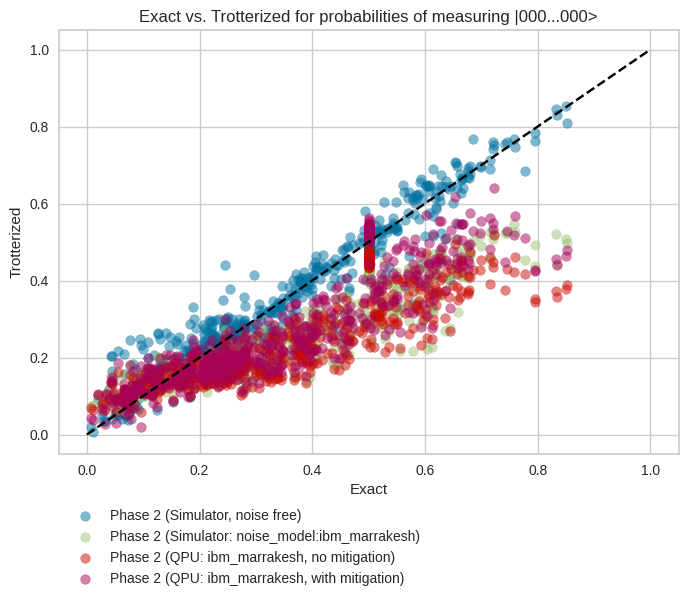

In [18]:
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_sim_extracted,
    label=f"Phase 2 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_sim_noisy_extracted,
    label=f"Phase 2 (Simulator: noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_nmit_extracted,
    label=f"Phase 2 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase2_exact_extracted,
    probs_phase2_mit_extracted,
    label=f"Phase 2 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")

plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

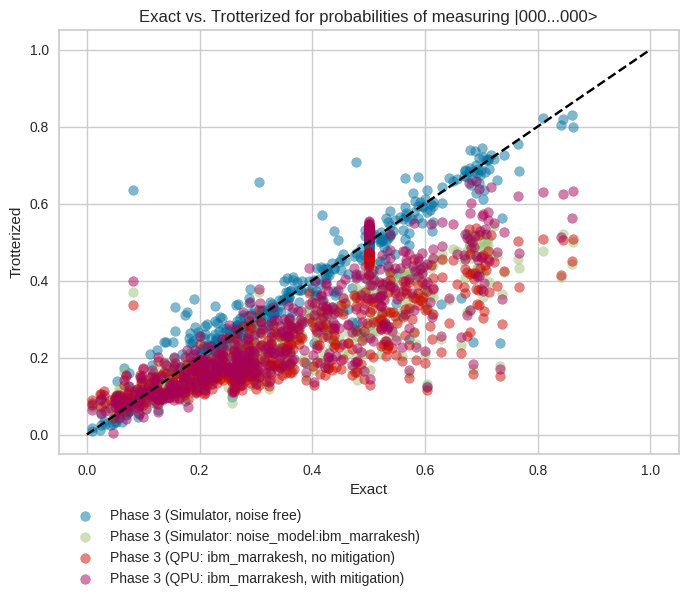

In [19]:
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_sim_extracted,
    label=f"Phase 3 (Simulator, noise free)",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_sim_noisy_extracted,
    label=f"Phase 3 (Simulator: noise_model:{backend_qpu_name})",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_nmit_extracted,
    label=f"Phase 3 (QPU: {backend_qpu_name}, no mitigation)",
    alpha=0.5,
)
plt.scatter(
    probs_phase3_exact_extracted,
    probs_phase3_mit_extracted,
    label=f"Phase 3 (QPU: {backend_qpu_name}, with mitigation)",
    alpha=0.5,
)
# Plot the 1:1 line
plt.plot([0, 1], [0, 1], "--", color="black")
plt.xlabel("Exact")
plt.ylabel("Trotterized")
plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
plt.title("Exact vs. Trotterized for probabilities of measuring |000...000>")
plt.show()

## Regression

In [20]:
data_exact_df = pd.read_json(f"{path}/data_exact_df.json")

In [21]:
data_sim_df = pd.read_json(f"{path}/data_sim_df.json")

In [22]:
data_sim_noisy_df = pd.read_json(f"{path}/data_sim_noisy_df.json")

In [23]:
data_nmit_df = pd.read_json(f"{path}/data_qpu_nmit_df.json")
data_mit_df = pd.read_json(f"{path}/data_qpu_mit_df.json")

In [24]:
# For debugging
# data_mit_df = data_exact_df

In [25]:
# Extract features which have overlap with data_mit_df (i.e. successful samples)
data_exact_df = data_exact_df[data_exact_df.index.isin(data_mit_df.sample_id)]

In [26]:
data_sim_df = data_sim_df[data_sim_df.index.isin(data_mit_df.sample_id)]

In [27]:
data_sim_noisy_df = data_sim_noisy_df[
    data_sim_noisy_df.index.isin(data_mit_df.sample_id)
]

In [28]:
data_nmit_df = data_nmit_df[data_nmit_df.index.isin(data_mit_df.sample_id)]

### Feature check

In [ ]:
print("Exact")
display(data_exact_df)

Exact


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,1,0.900047,-0.332700,0.635283,-0.609494,0.287738,-0.779225,-0.058833,-0.806006,...,-0.683787,-0.546998,-0.445753,-0.638873,-0.156718,-0.610967,0.111648,-0.469065,0.308467,1.582990
1,1,1,0.850001,-0.412066,0.486014,-0.624517,0.111061,-0.559195,-0.082970,-0.302143,...,-0.041813,0.171595,0.054095,0.347926,-0.058373,0.353618,-0.281554,0.170391,-0.450303,0.453302
2,2,1,0.897816,-0.290876,0.640270,-0.483702,0.335499,-0.535950,0.076776,-0.469539,...,-0.336297,-0.184153,-0.182929,-0.204061,-0.041636,-0.176450,0.066488,-0.123502,0.132407,1.100555
3,3,1,0.898511,-0.195204,0.674128,-0.262616,0.479211,-0.205658,0.386657,-0.134370,...,-0.135303,0.303237,-0.201439,0.216790,-0.275604,0.119879,-0.319299,0.047756,-0.333527,1.057326
4,4,1,0.967097,0.126070,0.878896,0.225838,0.761707,0.284416,0.645852,0.303312,...,0.297480,0.498253,0.287541,0.473686,0.291132,0.468802,0.316601,0.469811,0.361831,2.430337
5,5,1,0.790331,-0.310000,0.355392,-0.317697,0.066869,-0.038508,0.094203,0.238947,...,0.276044,0.366651,0.104858,0.252579,-0.056992,0.060816,-0.048947,-0.032092,0.095503,1.390452
6,6,1,0.905174,0.392721,0.653416,0.691569,0.321942,0.844675,-0.011694,0.853602,...,0.750433,-0.522324,0.566294,-0.663532,0.321318,-0.700998,0.040540,-0.617745,-0.228622,5.624548
7,7,1,0.942251,-0.161082,0.798125,-0.274746,0.630302,-0.326757,0.488604,-0.334308,...,-0.318443,0.326877,-0.288385,0.293764,-0.252019,0.274444,-0.227292,0.240054,-0.229836,1.090109
8,8,1,0.865242,-0.157150,0.556035,-0.321777,0.248575,-0.423261,0.040529,-0.388326,...,-0.239837,-0.082493,-0.073372,-0.037057,0.030573,0.036677,0.045328,0.094292,-0.023382,8.392081
9,9,1,0.989869,0.082264,0.964050,0.164233,0.929583,0.241075,0.889556,0.309520,...,0.370312,0.803684,0.422234,0.757579,0.463264,0.705039,0.496501,0.648946,0.525904,1.481529


In [ ]:
print("Simulator (noise free)")
display(data_sim_df)

Simulator (noise free)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,1,0.907000,-0.340316,0.663342,-0.618949,0.446963,-0.699511,0.032400,-0.775937,...,-0.656630,-0.222789,-0.421005,-0.171256,-0.216893,-0.411409,-0.109818,-0.275079,-0.003500,1.582990
1,1,1,0.863436,-0.407021,0.483886,-0.604502,0.140250,-0.544807,-0.132226,-0.288978,...,-0.008975,0.175444,0.051585,0.386597,-0.011336,0.369173,-0.242335,0.238245,-0.486841,0.453302
2,2,1,0.885704,-0.307905,0.673642,-0.500346,0.400432,-0.573517,0.113543,-0.504597,...,-0.418052,-0.129429,-0.296784,-0.126965,-0.197972,-0.197342,-0.079388,-0.101221,-0.083903,1.100555
3,3,1,0.903360,-0.192876,0.596377,-0.287957,0.328775,-0.232324,0.245246,-0.138072,...,-0.124353,0.070187,-0.087866,-0.059599,-0.099726,-0.031492,-0.276690,-0.165171,-0.287532,1.057326
4,4,1,0.966226,0.139450,0.900065,0.208881,0.814398,0.311428,0.651830,0.336368,...,0.364624,0.511169,0.391204,0.410991,0.437850,0.422894,0.402294,0.373674,0.453978,2.430337
5,5,1,0.806774,-0.341349,0.417403,-0.343955,0.128377,-0.240353,0.102186,0.146757,...,0.186886,0.242602,0.146683,0.207747,0.103210,0.059578,-0.115627,-0.051054,-0.043889,1.390452
6,6,1,0.912064,0.380969,0.657936,0.685921,0.334084,0.818926,-0.021773,0.861052,...,0.730618,-0.484214,0.528091,-0.610567,0.281482,-0.687139,0.032526,-0.552684,-0.210438,5.624548
7,7,1,0.921865,-0.158517,0.776621,-0.266527,0.536162,-0.305754,0.462032,-0.352655,...,-0.321258,0.157009,-0.316008,0.086312,-0.260430,0.206400,-0.265572,0.211701,-0.222077,1.090109
8,8,1,0.826762,-0.143543,0.518019,-0.161174,0.125945,-0.098644,0.007070,-0.297308,...,-0.159986,-0.018882,0.010660,0.074032,0.074232,0.183897,0.082518,0.229261,0.170759,8.392081
9,9,1,0.998312,0.078066,0.988321,0.152601,0.904217,0.220141,0.877418,0.306549,...,0.333939,0.786238,0.405458,0.697637,0.421475,0.698444,0.448824,0.637640,0.459606,1.481529


In [ ]:
print("Simulator (noisy)")
display(data_sim_noisy_df)

Simulator (noisy)


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,0.821289,0.577366,-0.249268,0.430732,-0.361549,0.252310,-0.422250,0.044050,-0.428645,...,-0.364334,-0.135065,-0.206506,-0.122958,-0.121550,-0.183231,-0.060489,-0.119766,0.010170,1.582990
1,1,0.805664,0.534604,-0.273543,0.305243,-0.345965,0.101332,-0.359997,-0.035514,-0.164757,...,-0.043419,0.072711,0.036229,0.235300,-0.005286,0.158602,-0.097306,0.120393,-0.200468,0.453302
2,2,0.793945,0.552327,-0.172607,0.413288,-0.282469,0.280257,-0.344473,0.026981,-0.266302,...,-0.219348,-0.081111,-0.168438,-0.099271,-0.123242,-0.088406,-0.029243,-0.064367,-0.025042,1.100555
3,3,0.797852,0.535149,-0.133477,0.373104,-0.184942,0.190059,-0.135643,0.158089,-0.033458,...,-0.062007,0.024704,-0.019459,-0.012545,-0.043234,-0.011344,-0.140673,-0.073958,-0.147178,1.057326
4,4,0.835938,0.592586,0.082635,0.559802,0.167845,0.500699,0.190439,0.327542,0.143996,...,0.213907,0.261855,0.229990,0.224120,0.241328,0.199729,0.169020,0.186438,0.218457,2.430337
5,5,0.817383,0.486477,-0.184846,0.230277,-0.232939,0.084155,-0.200250,0.029041,0.055764,...,0.109446,0.134839,0.075489,0.106554,0.030553,0.033872,-0.048307,-0.033538,-0.004641,1.390452
6,6,0.813477,0.549566,0.230825,0.421397,0.403068,0.180833,0.556250,-0.004838,0.432514,...,0.386452,-0.260096,0.288159,-0.342569,0.149613,-0.281550,0.034218,-0.279738,-0.084339,5.624548
7,7,0.793945,0.582436,-0.128891,0.461870,-0.182086,0.314916,-0.171818,0.243385,-0.163592,...,-0.171542,0.118001,-0.147694,0.041566,-0.132577,0.120823,-0.100893,0.106825,-0.072319,1.090109
8,8,0.823242,0.556378,-0.086337,0.332174,-0.112998,0.087821,-0.007677,0.013498,-0.162820,...,-0.068274,-0.023178,-0.016007,0.016536,0.020445,0.059267,0.006317,0.118710,0.087283,8.392081
9,9,0.825195,0.594675,0.083240,0.627709,0.086810,0.571776,0.126070,0.448555,0.155130,...,0.214706,0.441325,0.175293,0.387863,0.232661,0.302324,0.217374,0.285783,0.180161,1.481529


In [ ]:
print("no mitigation")
display(data_nmit_df)

print("mitigation")
display(data_mit_df)

no mitigation


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,1,0.786174,-0.313905,0.651757,-0.514172,0.271292,-0.670904,0.080067,-0.626846,...,-0.553917,-0.258010,-0.310263,-0.189724,-0.120144,-0.289617,-0.121651,-0.200929,0.053247,1.582990
1,1,1,0.662797,-0.511849,0.317660,-0.624975,0.001809,-0.517665,-0.146839,-0.181016,...,-0.009104,0.141544,0.052335,0.281270,-0.068548,0.273161,-0.203888,0.155775,-0.330954,0.453302
2,2,1,0.796623,-0.248235,0.610645,-0.389516,0.416220,-0.452257,0.163791,-0.398234,...,-0.342350,-0.061449,-0.272681,-0.092200,-0.174478,-0.108979,-0.111648,-0.106718,-0.087229,1.100555
3,3,1,0.702072,-0.337600,0.479648,-0.348391,0.254559,-0.179951,0.202523,-0.157449,...,-0.124049,0.028799,-0.083117,-0.051985,-0.081701,-0.083379,-0.184011,-0.192688,-0.184018,1.057326
4,4,1,0.823054,0.113174,0.740890,0.209704,0.663013,0.230135,0.492119,0.249878,...,0.277797,0.341940,0.317958,0.284683,0.361271,0.247144,0.269082,0.225285,0.298845,2.430337
5,5,1,0.643045,-0.353417,0.272517,-0.382240,0.066984,-0.254122,0.055204,0.112526,...,0.159237,0.198908,0.066576,0.156709,0.019853,0.048732,-0.115239,-0.055988,-0.063567,1.390452
6,6,1,0.673599,0.342507,0.469990,0.580046,0.171207,0.680201,-0.044698,0.587438,...,0.469379,-0.378654,0.349859,-0.478622,0.145250,-0.468759,-0.037196,-0.380361,-0.175003,5.624548
7,7,1,0.710250,-0.074917,0.621137,-0.139353,0.424257,-0.195448,0.316937,-0.182197,...,-0.189573,0.153358,-0.174005,0.094207,-0.153358,0.149238,-0.110597,0.151961,-0.108486,1.090109
8,8,1,0.640947,-0.086899,0.411044,-0.113627,0.121321,-0.070433,0.036200,-0.193286,...,-0.094880,0.000222,0.001877,0.030077,0.040749,0.077960,0.038089,0.094057,0.084404,8.392081
9,9,1,0.820342,-0.075208,0.751840,0.096190,0.741537,0.160667,0.673079,0.087869,...,0.222138,0.589335,0.248564,0.568736,0.250192,0.456556,0.259727,0.450862,0.192850,1.481529


mitigation


,sample_id,f_0 Re,f_1 Re,f_1 Im,f_2 Re,f_2 Im,f_3 Re,f_3 Im,f_4 Re,f_4 Im,...,f_5 Im,f_6 Re,f_6 Im,f_7 Re,f_7 Im,f_8 Re,f_8 Im,f_9 Re,f_9 Im,expected_value
0,0,0.849121,0.593301,-0.238268,0.483375,-0.380450,0.199045,-0.496047,0.056517,-0.462651,...,-0.407016,-0.189910,-0.226079,-0.138604,-0.088638,-0.214314,-0.088666,-0.147857,0.038206,1.582990
1,1,0.854004,0.488007,-0.377209,0.234218,-0.461645,0.000362,-0.382822,-0.106550,-0.133175,...,-0.006285,0.105959,0.039732,0.208042,-0.050803,0.201436,-0.151229,0.114502,-0.242360,0.453302
2,2,0.841797,0.587916,-0.182814,0.451623,-0.288352,0.306552,-0.335549,0.122365,-0.294105,...,-0.254191,-0.044818,-0.202399,-0.067150,-0.129078,-0.078702,-0.083331,-0.079543,-0.064249,1.100555
3,3,0.859375,0.519718,-0.249535,0.354950,-0.256613,0.190033,-0.131639,0.147177,-0.115091,...,-0.090435,0.020143,-0.060280,-0.038295,-0.061846,-0.061135,-0.135683,-0.143004,-0.135886,1.057326
4,4,0.858154,0.609507,0.083242,0.545582,0.155184,0.486848,0.169540,0.360739,0.183143,...,0.204178,0.250690,0.233014,0.209759,0.265249,0.180821,0.197357,0.164362,0.219658,2.430337
5,5,0.865234,0.474040,-0.262800,0.200327,-0.282997,0.050516,-0.187256,0.039390,0.083697,...,0.117325,0.146211,0.050311,0.114820,0.014459,0.035805,-0.085202,-0.040731,-0.046619,1.390452
6,6,0.856201,0.498802,0.253161,0.345602,0.428565,0.125777,0.500664,-0.033380,0.432218,...,0.347573,-0.281016,0.257978,-0.352369,0.106838,-0.345468,-0.029118,-0.280539,-0.128527,5.624548
7,7,0.859375,0.526049,-0.056590,0.460419,-0.102052,0.312181,-0.143014,0.232810,-0.134040,...,-0.140183,0.112117,-0.128758,0.070232,-0.113768,0.110185,-0.081944,0.112808,-0.079514,1.090109
8,8,0.854248,0.472333,-0.064078,0.305639,-0.083547,0.090014,-0.052215,0.027318,-0.143439,...,-0.069542,-0.000139,0.001632,0.023212,0.029319,0.057859,0.028011,0.068666,0.061455,8.392081
9,9,0.858887,0.607468,-0.052869,0.557225,0.073105,0.547498,0.117319,0.497425,0.063478,...,0.163832,0.436370,0.182203,0.417716,0.184699,0.337112,0.190608,0.333133,0.141095,1.481529


## Exact

In [33]:
train_size = 0.8
session_id = 42
sort = "MSE"

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0266,0.0030,0.0437,0.9991,0.0153,0.0328,0.3010
br,Bayesian Ridge,0.1645,0.1646,0.2638,0.9838,0.0603,0.1420,0.1620
huber,Huber Regressor,0.3217,0.3193,0.4504,0.9483,0.0838,0.1996,0.1520
et,Extra Trees Regressor,1.3060,3.3557,1.7050,0.6168,0.3547,0.7525,0.0180
ridge,Ridge Regression,1.2931,3.4849,1.6762,0.5950,0.3624,1.2016,0.1630
ada,AdaBoost Regressor,1.3850,3.6352,1.7238,0.4636,0.4113,1.2035,0.0110
gbr,Gradient Boosting Regressor,1.4131,3.8392,1.8381,0.3787,0.4022,0.8269,0.0110
rf,Random Forest Regressor,1.5184,3.9125,1.8425,0.4817,0.4238,1.0911,0.0220
knn,K Neighbors Regressor,1.5508,4.4263,1.9425,0.4780,0.4374,1.2223,0.0130
par,Passive Aggressive Regressor,1.6587,4.6399,1.9879,0.2467,0.4586,1.2673,0.1620


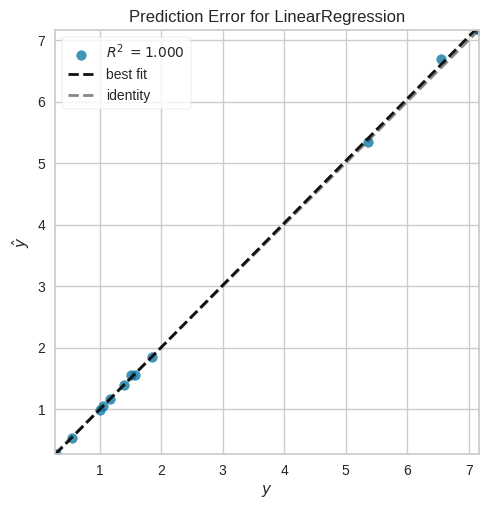

In [34]:
s_exact = RegressionExperiment()
s_exact.setup(
    data=data_exact_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)

best_exact = s_exact.compare_models(turbo=True, sort=sort)
s_exact.plot_model(best_exact, plot="error")

## Trotter (Simulation, Noise free)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,1.2624,2.5346,1.5373,0.5768,0.3535,1.3492,0.0050
et,Extra Trees Regressor,1.2142,2.7522,1.5816,0.6010,0.3199,0.5894,0.0180
huber,Huber Regressor,1.1992,2.8243,1.5688,0.3427,0.3128,0.7778,0.0070
ada,AdaBoost Regressor,1.1274,2.9214,1.4670,0.6291,0.3158,0.6488,0.0110
ridge,Ridge Regression,1.2641,3.1276,1.5767,0.6454,0.3437,1.0833,0.0050
gbr,Gradient Boosting Regressor,1.1550,3.1696,1.5670,0.5993,0.3117,0.7157,0.0110
br,Bayesian Ridge,1.3017,3.3847,1.7092,0.4535,0.3376,0.9645,0.0060
rf,Random Forest Regressor,1.3531,3.4106,1.6817,0.5833,0.3800,1.0806,0.0220
dt,Decision Tree Regressor,1.2799,4.2681,1.8238,0.4422,0.3331,0.4687,0.0050
knn,K Neighbors Regressor,1.6541,4.8876,2.0726,0.4432,0.4583,1.1846,0.0170


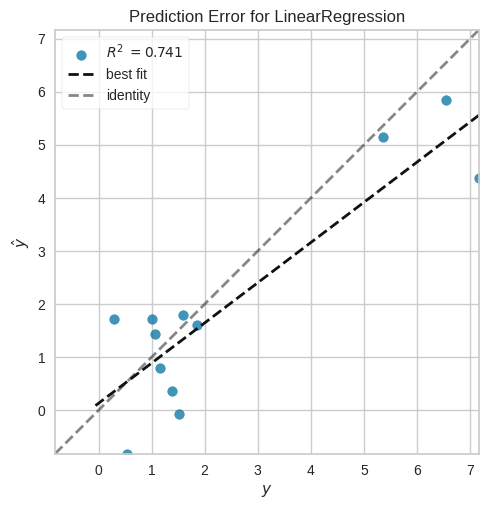

In [35]:
s_sim = RegressionExperiment()
s_sim.setup(
    data=data_sim_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)

best_sim = s_sim.compare_models(turbo=True, sort=sort)
s_sim.plot_model(best_sim, plot="error")

## Trotter (Simulation, Noisy)

In [36]:
def create_model_and_plot(
    experiment: RegressionExperiment,
    exact_experiment: RegressionExperiment,  # 比較用: non-Trotter シミュレータのノイズなしの結果
    sim_experiment: RegressionExperiment,  # 比較用: Trotter シミュレータのノイズなしの結果
    reg_method=None,  # 回帰手法. "ada", "dt", "et", "gbr", "knn", "lar", "lightgbm", "lr", "mlp", "omp", "par", "ransac", "rf", "ridge", "svm", "xgboost"
) -> None:
    # モデルを作成
    if reg_method:  # 指定された回帰手法でモデルを作成
        model = experiment.create_model(reg_method, verbose=False)
        sim_model = sim_experiment.create_model(reg_method, verbose=False)
    else:  # 指定されなければ最適なモデルを作成
        model = experiment.compare_models(turbo=True, sort=sort, verbose=False)
        sim_model = sim_experiment.compare_models(turbo=True, sort=sort, verbose=False)

    # exact は最適なモデル (おそらく線形回帰) を作成
    exact_model = exact_experiment.compare_models(turbo=True, sort=sort, verbose=False)

    experiment.tune_model(model, optimize=sort, choose_better=True, verbose=False)
    exact_experiment.tune_model(
        exact_model, optimize=sort, choose_better=True, verbose=False
    )
    sim_experiment.tune_model(
        sim_model, optimize=sort, choose_better=True, verbose=False
    )

    # 回帰手法の名前を取得
    reg_method = model.__class__.__name__
    exact_reg_method = exact_model.__class__.__name__
    sim_reg_method = sim_model.__class__.__name__

    # 予測
    pred = experiment.predict_model(model)
    x = pred["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
    y = pred["prediction_label"].values
    r2 = r2_score(x, y)
    mse = mean_squared_error(x, y)

    exact_pred = exact_experiment.predict_model(exact_model)
    exact_x = exact_pred["expected_value"].values.reshape(-1, 1)
    exact_y = exact_pred["prediction_label"].values
    exact_r2 = r2_score(exact_x, exact_y)
    exact_mse = mean_squared_error(exact_x, exact_y)

    sim_pred = sim_experiment.predict_model(sim_model)
    sim_x = sim_pred["expected_value"].values.reshape(-1, 1)
    sim_y = sim_pred["prediction_label"].values
    sim_r2 = r2_score(sim_x, sim_y)
    sim_mse = mean_squared_error(sim_x, sim_y)

    # 回帰直線を計算
    linear_model = LinearRegression()
    linear_model.fit(x, y)
    slope = linear_model.coef_[0]
    intercept = linear_model.intercept_

    exact_linear_model = LinearRegression()
    exact_linear_model.fit(exact_x, exact_y)
    exact_slope = exact_linear_model.coef_[0]
    exact_intercept = exact_linear_model.intercept_

    sim_linear_model = LinearRegression()
    sim_linear_model.fit(sim_x, sim_y)
    sim_slope = sim_linear_model.coef_[0]
    sim_intercept = sim_linear_model.intercept_

    # プロット
    plt.figure(figsize=(8, 6))
    plt.scatter(
        x,
        y,
        alpha=0.5,
        color="green",
        label=f"{reg_method}, R2 = {r2:.2f}, MSE = {mse:.2f}",
    )
    plt.scatter(
        exact_x,
        exact_y,
        alpha=0.5,
        color="red",
        label=f"non-Trotter Sim: {exact_reg_method}, R2 = {exact_r2:.2f}, MSE = {exact_mse:.2f}",
    )
    plt.scatter(
        sim_x,
        sim_y,
        alpha=0.5,
        color="blue",
        label=f"Trotter Sim: {sim_reg_method}, R2 = {sim_r2:.2f}, MSE = {sim_mse:.2f}",
    )

    # 回帰直線を追加
    x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    plt.plot(
        x_range,
        linear_model.predict(x_range),
        color="green",
        label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
    )
    exact_x_range = np.linspace(exact_x.min(), exact_x.max(), 100).reshape(-1, 1)
    plt.plot(
        exact_x_range,
        exact_linear_model.predict(exact_x_range),
        color="red",
        label=f"non-Trotter Sim: Best fit line (y = {exact_slope:.2f}x + {exact_intercept:.2f})",
    )
    sim_x_range = np.linspace(sim_x.min(), sim_x.max(), 100).reshape(-1, 1)
    plt.plot(
        sim_x_range,
        sim_linear_model.predict(sim_x_range),
        color="blue",
        label=f"Trotter Sim: Best fit line (y = {sim_slope:.2f}x + {sim_intercept:.2f})",
    )

    # Identity line
    plt.plot(
        [x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity"
    )

    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend(bbox_to_anchor=(0, -0.1), loc="upper left")
    plt.title(f"{n_qubits}Q - Predicted vs Actual")
    plt.show()

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.0882,2.3722,1.5402,0.5587,0.3825,0.6817


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0230,0.0022,0.0468,0.9996,0.0091,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.9195,1.3939,1.1806,0.7407,0.4056,0.9542


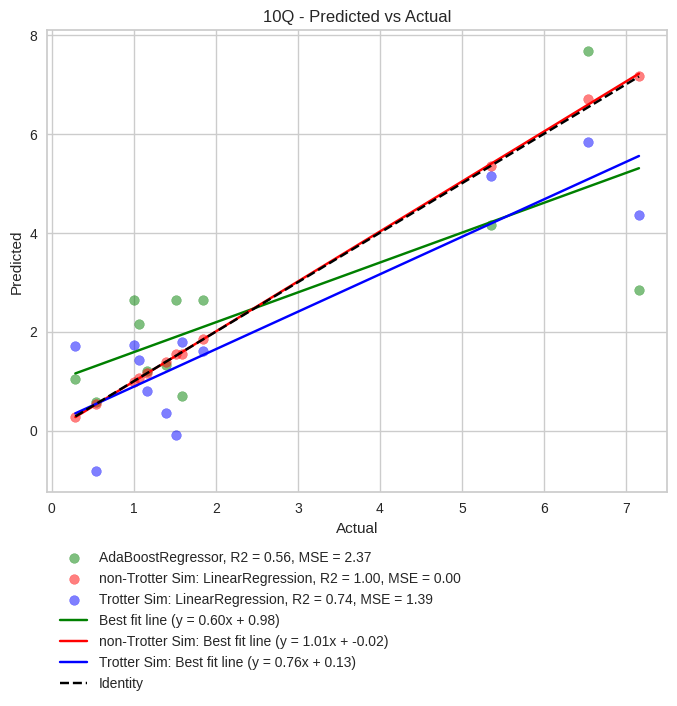

In [37]:
s_sim_noisy = RegressionExperiment()
s_sim_noisy.setup(
    data=data_sim_noisy_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_sim_noisy, s_exact, s_sim)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:06:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.0046,1.9719,1.2555,0.7381,0.2945,0.7364,0.0110
et,Extra Trees Regressor,1.1752,2.6503,1.5287,0.6280,0.3246,0.6385,0.0180
huber,Huber Regressor,1.3544,3.0019,1.6322,0.4616,0.3926,1.4253,0.0070
par,Passive Aggressive Regressor,1.4326,3.2526,1.6737,0.6205,0.3942,1.2463,0.0060
gbr,Gradient Boosting Regressor,1.1748,3.3101,1.6808,0.4746,0.3445,0.5880,0.0120
br,Bayesian Ridge,1.2945,3.3339,1.7050,0.5767,0.3259,0.9600,0.0060
rf,Random Forest Regressor,1.3539,3.3943,1.7200,0.5324,0.3796,0.9507,0.0210
lr,Linear Regression,1.4871,3.6248,1.7913,0.4765,0.4028,1.3451,0.0060
ridge,Ridge Regression,1.4267,3.8509,1.7435,0.5715,0.3964,1.2813,0.0050
knn,K Neighbors Regressor,1.5549,4.0356,1.9031,0.5344,0.4243,1.0787,0.0080


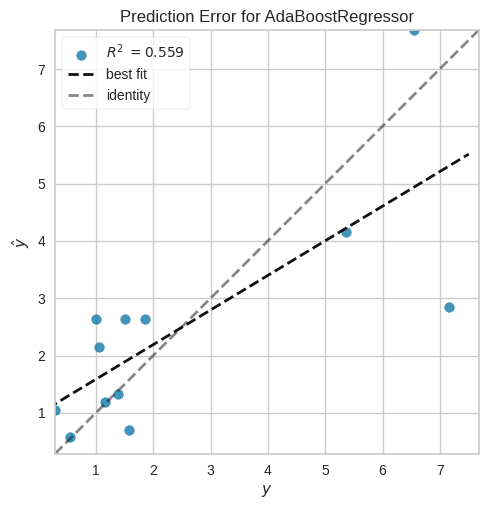

In [46]:
# これと同じ予測を上のセルでは行なっている
# best_sim_noisy = s_sim_noisy.compare_models(turbo=True, sort=sort)
# s_sim_noisy.plot_model(best_sim_noisy, plot="error")

## Trotter (QPU, no mitigation)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.1962,2.4888,1.5776,0.5370,0.3913,0.7858


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0230,0.0022,0.0468,0.9996,0.0091,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.9195,1.3939,1.1806,0.7407,0.4056,0.9542


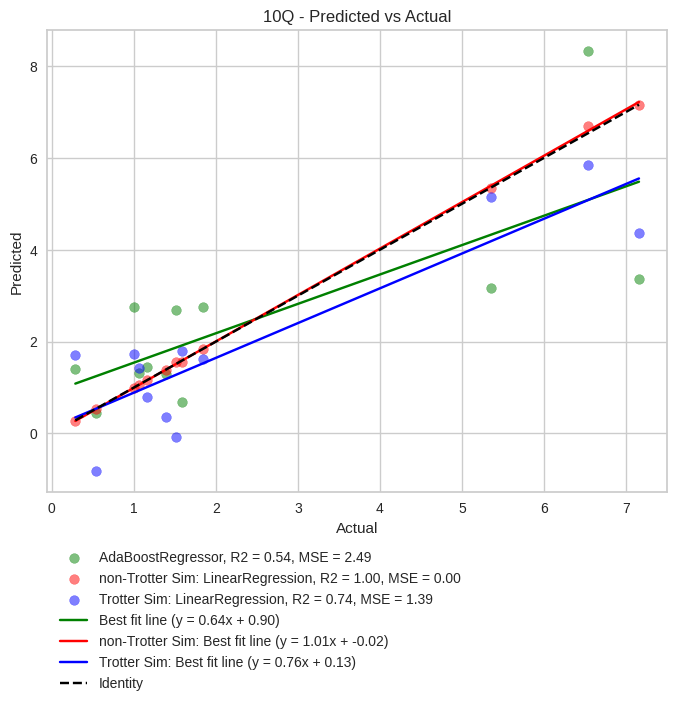

In [39]:
s_nmit = RegressionExperiment()
s_nmit.setup(
    data=data_nmit_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_nmit, s_exact, s_sim)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.2386,3.0366,1.5317,0.6159,0.3157,0.6386,0.0100
et,Extra Trees Regressor,1.3263,3.0881,1.6348,0.6234,0.3313,0.6658,0.0180
gbr,Gradient Boosting Regressor,1.2984,3.1521,1.6112,0.5540,0.3462,0.6909,0.0110
rf,Random Forest Regressor,1.4315,3.5341,1.7584,0.5239,0.3585,0.7706,0.0210
par,Passive Aggressive Regressor,1.5739,4.0073,1.9054,0.5129,0.4408,1.6433,0.0050
br,Bayesian Ridge,1.5977,4.0877,1.9178,0.4919,0.4320,1.6476,0.0050
ridge,Ridge Regression,1.5375,4.2287,1.8691,0.5253,0.4181,1.4548,0.0050
knn,K Neighbors Regressor,1.6678,4.7486,2.0876,0.3913,0.4536,1.2083,0.0070
dt,Decision Tree Regressor,1.4808,4.9134,2.0222,0.2939,0.4050,0.5782,0.0050
omp,Orthogonal Matching Pursuit,1.6561,5.5112,2.1579,0.3885,0.4073,0.8143,0.0050


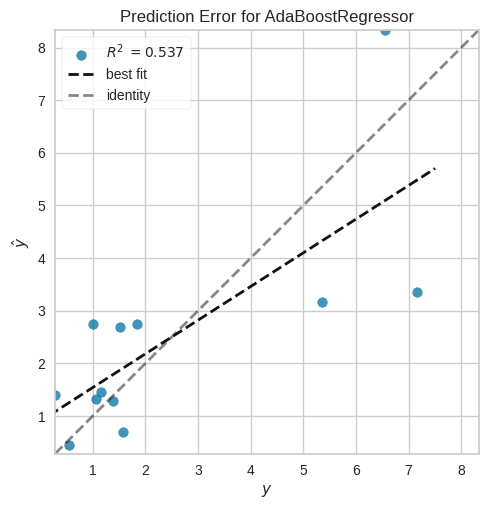

In [47]:
# これと同じ予測を上のセルでは行なっている
# best_nmit = s_nmit.compare_models(turbo=True, sort=sort)
# s_nmit.plot_model(best_nmit, plot="error")

In [40]:
# create_model_and_plot(s_nmit, s_exact, s_sim, reg_method="et")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:58:32
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.3463,4.9544,2.2258,0.5334,0.3760,0.7366
1,0.9105,1.3377,1.1566,0.9187,0.2996,0.6127
2,2.1695,6.1624,2.4824,0.7569,0.3874,1.3570
3,1.0077,1.7791,1.3338,0.6615,0.2272,0.3206
4,1.0894,1.8637,1.3652,0.7828,0.2056,0.2190
5,0.9159,1.3884,1.1783,0.7459,0.2371,0.3218
6,1.5404,2.4065,1.5513,0.7991,0.4671,1.1089
7,0.9330,1.0155,1.0077,0.6518,0.2422,0.3328
8,0.7665,1.1632,1.0785,0.3072,0.3323,0.4653


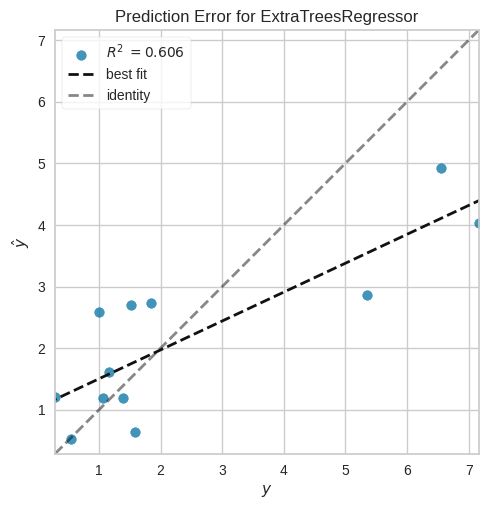

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.0619,7.0579,2.6567,0.3353,0.6330,2.7603
1,1.3512,2.5036,1.5823,0.8479,0.4039,1.2455
2,2.8220,10.8951,3.3008,0.5702,0.5378,3.0266
3,1.1148,1.4592,1.2080,0.7224,0.2753,0.4595
4,1.4208,4.1244,2.0309,0.5193,0.2763,0.2430
5,0.7073,0.7039,0.8390,0.8712,0.2389,0.5242
6,1.5557,3.4700,1.8628,0.7103,0.4143,0.8737
7,1.2003,2.0619,1.4359,0.2930,0.3255,0.4449
8,1.1782,1.7408,1.3194,-0.0368,0.4425,1.0759


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,1.1334,2.1168,1.4549,0.6062,0.3716,0.7111


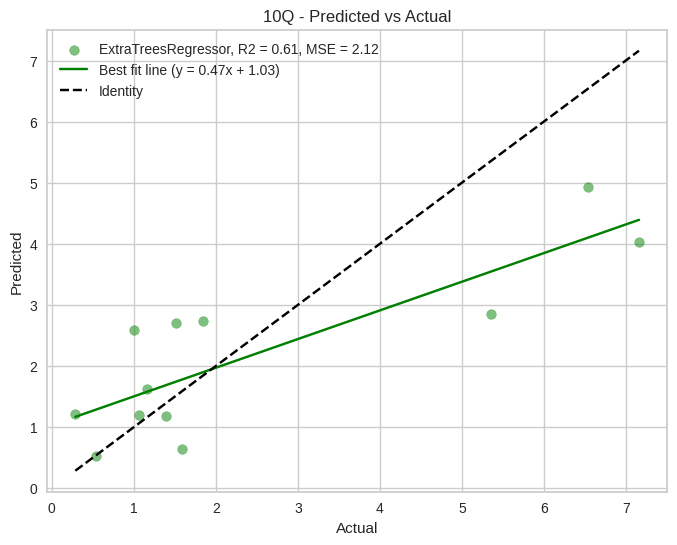

In [41]:
# model_nmit = s_nmit.compare_models(turbo=True, sort="R2")
model_nmit = s_nmit.create_model("et")
s_nmit.plot_model(model_nmit, plot="error")
s_nmit.tune_model(model_nmit, optimize=sort, choose_better=True)
prod = s_nmit.predict_model(model_nmit)
x = prod["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
y = prod["prediction_label"].values
r2 = r2_score(x, y)
mse = mean_squared_error(x, y)

# 回帰手法の名前を取得
reg_method = model_nmit.__class__.__name__

# 回帰直線を計算
linear_model = LinearRegression()
linear_model.fit(x, y)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(
    x,
    y,
    color="green",
    alpha=0.5,
    label=f"{reg_method}, R2 = {r2:.2f}, MSE = {mse:.2f}",
)

# 回帰直線を追加
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(
    x_range,
    linear_model.predict(x_range),
    color="green",
    label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
)

# Identity line
plt.plot([x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title(f"{n_qubits}Q - Predicted vs Actual")
plt.show()

## Trotter (QPU, mitigation)

,Description,Value
0,Session id,42
1,Target,expected_value
2,Target type,Regression
3,Original data shape,"(56, 21)"
4,Transformed data shape,"(56, 20)"
5,Transformed train set shape,"(44, 20)"
6,Transformed test set shape,"(12, 20)"
7,Ignore features,2
8,Numeric features,19
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.1618,2.2125,1.4874,0.5884,0.4002,0.8874


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0230,0.0022,0.0468,0.9996,0.0091,0.0130


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.9195,1.3939,1.1806,0.7407,0.4056,0.9542


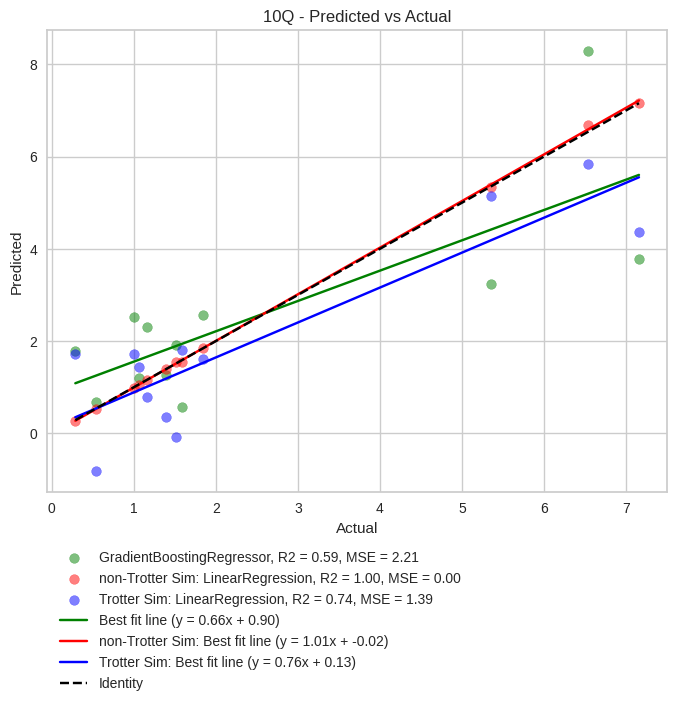

In [42]:
s_mit = RegressionExperiment()
s_mit.setup(
    data=data_mit_df,
    target="expected_value",
    ignore_features=["sample_id", "norm"],
    train_size=train_size,
    session_id=session_id,
)
create_model_and_plot(s_mit, s_exact, s_sim)

In [43]:
# create_model_and_plot(s_mit, s_exact, s_sim, reg_method="et")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:01:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.1829,2.8445,1.5417,0.6138,0.3135,0.6296,0.0110
ada,AdaBoost Regressor,1.2796,3.0020,1.5408,0.5868,0.3339,0.6961,0.0110
et,Extra Trees Regressor,1.4231,3.4418,1.7431,0.5601,0.3575,0.7876,0.0180
rf,Random Forest Regressor,1.4565,3.5571,1.7838,0.5160,0.3744,0.8324,0.0220
br,Bayesian Ridge,1.5955,4.0704,1.9142,0.4933,0.4301,1.6327,0.0060
knn,K Neighbors Regressor,1.6568,4.7004,2.0795,0.3964,0.4522,1.2049,0.0060
ridge,Ridge Regression,1.6041,4.7292,1.9577,0.4924,0.4354,1.5655,0.0050
par,Passive Aggressive Regressor,1.6437,5.0019,2.0605,0.3818,0.4370,1.1756,0.0060
omp,Orthogonal Matching Pursuit,1.6565,5.5079,2.1579,0.3879,0.4071,0.8131,0.0050
dt,Decision Tree Regressor,1.6417,5.9646,2.2036,0.1477,0.4392,0.6646,0.0050


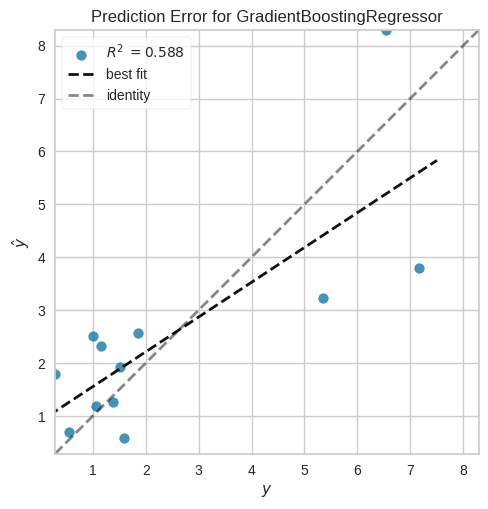

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8463,6.1507,2.4801,0.4208,0.5714,2.2689
1,1.2110,2.4055,1.5510,0.8539,0.2857,0.5515
2,2.7550,10.6016,3.2560,0.5818,0.4898,2.3862
3,1.5865,3.0547,1.7478,0.4188,0.3521,0.6164
4,1.2437,1.9561,1.3986,0.7720,0.2849,0.3131
5,0.8272,0.9500,0.9747,0.8261,0.3845,1.0072
6,1.2642,1.9374,1.3919,0.8383,0.3493,0.7588
7,1.0520,1.1896,1.0907,0.5921,0.2453,0.3454
8,0.9875,1.3139,1.1462,0.2175,0.3558,0.7089


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1.1618,2.2125,1.4874,0.5884,0.4002,0.8874


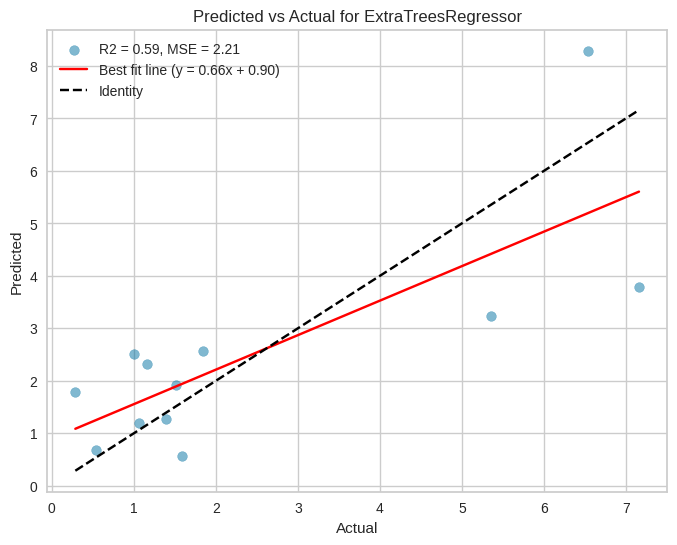

In [45]:
model_mit = s_mit.compare_models(turbo=True, sort=sort)
s_mit.plot_model(model_mit, plot="error")
s_mit.tune_model(model_mit, optimize=sort, choose_better=True)
prod = s_mit.predict_model(model_mit)
x = prod["expected_value"].values.reshape(-1, 1)  # サンプル数 x 1
y = prod["prediction_label"].values
r2 = r2_score(x, y)
mse = mean_squared_error(x, y)

# 回帰直線を計算
linear_model = LinearRegression()
linear_model.fit(x, y)
slope = linear_model.coef_[0]
intercept = linear_model.intercept_

# プロット
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label=f"R2 = {r2:.2f}, MSE = {mse:.2f}")

# 回帰直線を追加
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
plt.plot(
    x_range,
    linear_model.predict(x_range),
    color="red",
    label=f"Best fit line (y = {slope:.2f}x + {intercept:.2f})",
)

# Identity line
plt.plot([x.min(), x.max()], [x.min(), x.max()], "--", color="black", label="Identity")

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.title(f"Predicted vs Actual for {model_nmit.__class__.__name__}")
plt.show()